In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import data

In [2]:
#import Training Data into Pandas DataFrame
fashion_train_df = pd.read_csv('../datasets/fashion/fashion-mnist_train.csv')

In [3]:
#import Test Data into Pandas DataFrame
fashion_test_df = pd.read_csv('../datasets/fashion/fashion-mnist_test.csv')

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Explore Data

In [6]:
fashion_train_df.shape

(60000, 785)

In [7]:
fashion_test_df.shape

(10000, 785)

In [8]:
training = np.array(fashion_train_df, dtype='float32')

In [9]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
testing = np.array(fashion_test_df, dtype='float32')

In [11]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

0.0

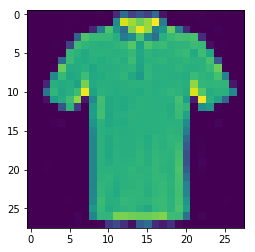

In [12]:
import random
i = random.randint(0, 60000)
plt.imshow(training[i, 1:].reshape(28,28))
label = training[i,0]
label

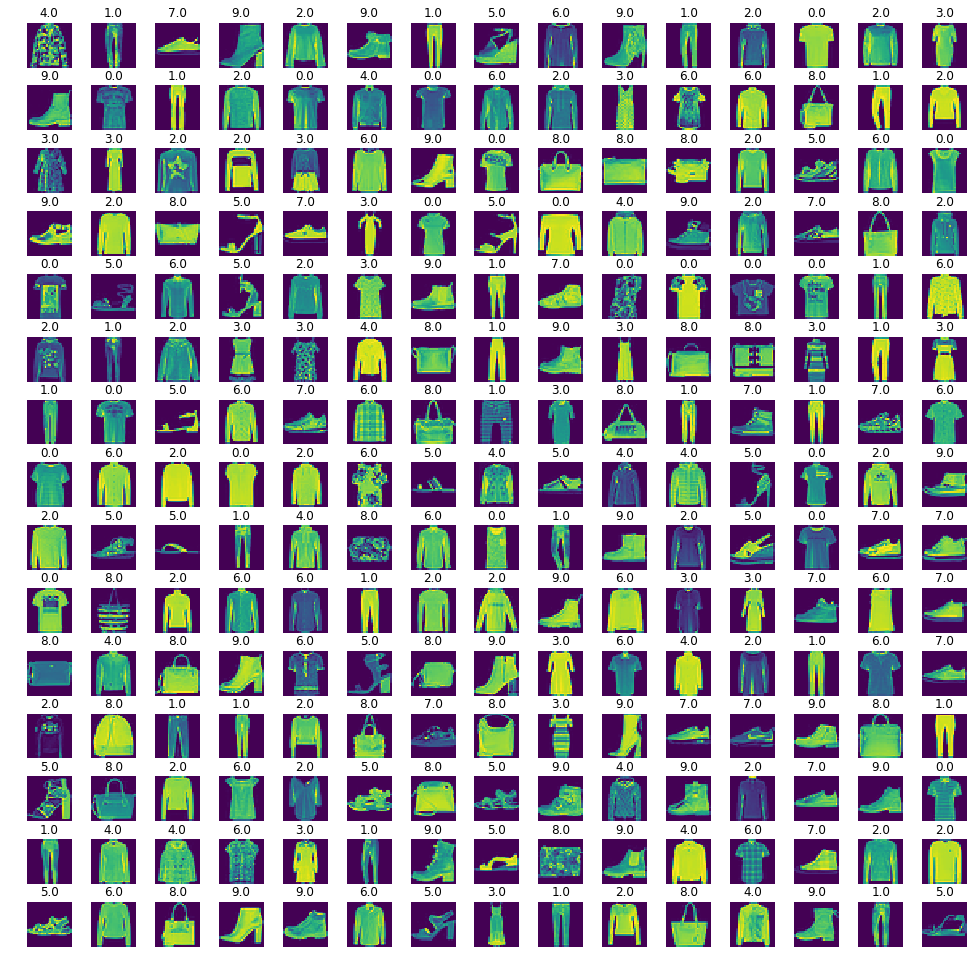

In [13]:
# Create grid for imagesto print out

W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
#Flatten
axes = axes.ravel()

n_training = len(training)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].axis('off')
    axes[i].set_title(training[index,0])
    
plt.subplots_adjust(hspace = 0.4)

### data Prep

In [14]:
X_train = training[:, 1:]/255
y_train = training[:,0]
X_test = testing[:, 1:]/255
y_test = testing[:,0]

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size =0.2, random_state=5)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_validate.shape)
print(y_validate.shape)

(48000, 784)
(48000,)
(10000, 784)
(10000,)
(12000, 784)
(12000,)


In [19]:
# reshape for model
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_validate.shape)
print(y_validate.shape)

(48000, 28, 28, 1)
(48000,)
(10000, 28, 28, 1)
(10000,)
(12000, 28, 28, 1)
(12000,)


### model

In [21]:
import keras

Using TensorFlow backend.


In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [23]:
input_dim = X_train.shape[1:]
input_dim

(28, 28, 1)

In [24]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape= input_dim))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# cnn_model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape= input_dim))
# cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation = 'relu'))
cnn_model.add(Dense(units = 84, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'sigmoid'))

In [25]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               553080    
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                850       
Total params: 564,926
Trainable params: 564,926
Non-trainable params: 0
_________________________________________________________________


In [26]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy',
            optimizer = Adam(lr = 0.001),
            metrics = ['accuracy'])

In [27]:
model_hist = cnn_model.fit(X_train,
                   y_train,
                   batch_size=500,
                   nb_epoch=50,
                   #shuffle=True,
                   verbose = 1,
                   validation_data = (X_validate, y_validate))

C:\Users\Sage\Anaconda3\envs\cv_tf_gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 90us/step - loss: 0.7662 - acc: 0.7354 - val_loss: 0.4795 - val_acc: 0.8309
Epoch 2/50
48000/48000 [==============================] - 1s 22us/step - loss: 0.4358 - acc: 0.8454 - val_loss: 0.4058 - val_acc: 0.8590
Epoch 3/50
48000/48000 [==============================] - 1s 22us/step - loss: 0.3777 - acc: 0.8660 - val_loss: 0.3756 - val_acc: 0.8694
Epoch 4/50
48000/48000 [==============================] - 1s 22us/step - loss: 0.3405 - acc: 0.8789 - val_loss: 0.3536 - val_acc: 0.8752
Epoch 5/50
48000/48000 [==============================] - 1s 22us/step - loss: 0.3184 - acc: 0.8886 - val_loss: 0.3354 - val_acc: 0.8802
Epoch 6/50
48000/48000 [==============================] - 1s 22us/step - loss: 0.2892 - acc: 0.8978 - val_loss: 0.3098 - val_acc: 0.8891
Epoch 7/50
48000/48000 [==============================] - 1s 22us/step - loss: 0.2752 - acc: 0.9020 - val_loss: 0.3050 - val_acc

In [28]:
model_hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

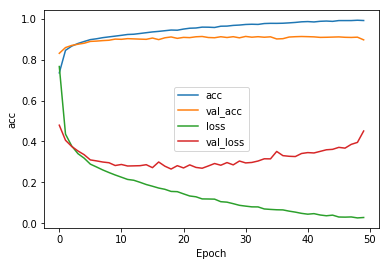

In [29]:
plt.plot(model_hist.history['acc'], label='acc')
plt.plot(model_hist.history['val_acc'], label='val_acc')
plt.plot(model_hist.history['loss'], label='loss')
plt.plot(model_hist.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('acc/loss')
plt.title('')
plt.legend()

In [30]:
evaluation = cnn_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 63us/step


In [31]:
print('Test Accuracy: {}'.format(evaluation[1]))

Test Accuracy: 0.8993


In [32]:
y_pred = cnn_model.predict_classes(X_test)

In [33]:
y_pred

array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

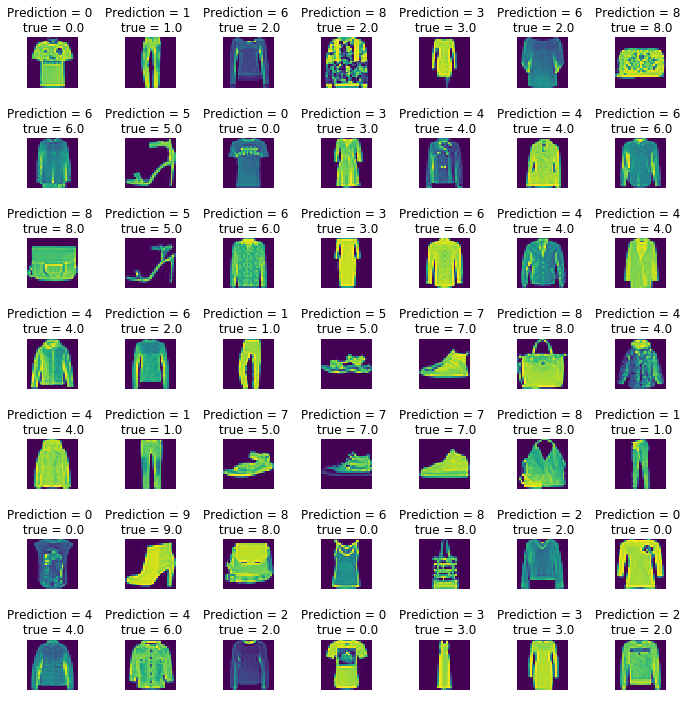

In [35]:
L = 7
W = 7

fig, axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Prediction = {} \n true = {}'.format(y_pred[i],y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 1)

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

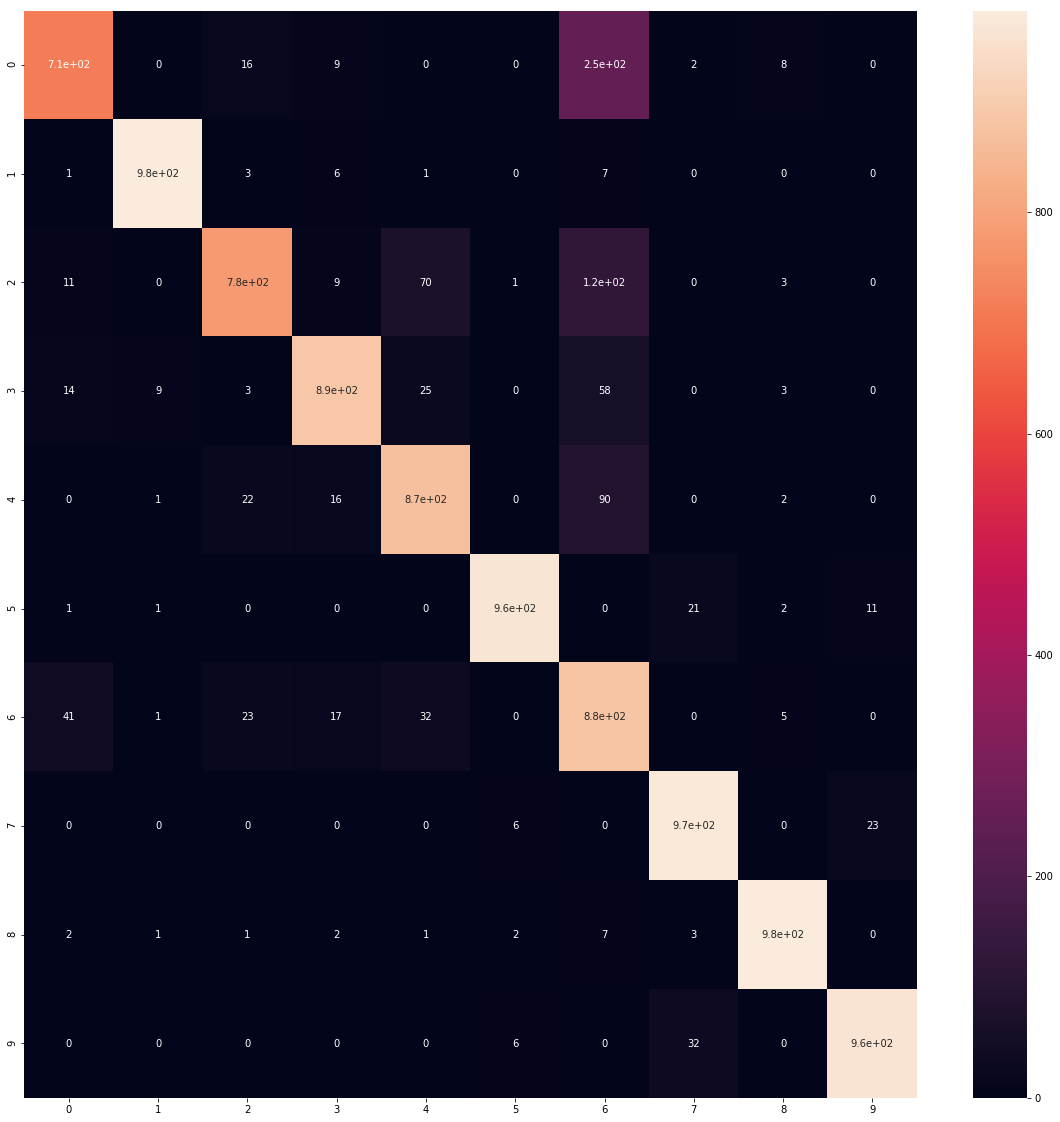

In [37]:

plt.figure(figsize = (20, 20))
sns.heatmap(cm, annot = True)

# y is prediction
# x is true class

In [39]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names = target_names ))

NameError: name 'predicted_classes' is not defined